<a href="https://colab.research.google.com/github/jagatabhay/TSAI/blob/master/S15/fg_bg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

background = cv2.imread('gdrive/My Drive/S14-15Datasets/bg224x224/bg098.jpg')
foreground = cv2.imread('gdrive/My Drive/S14-15Datasets/fg125x125/fg096.jpg')

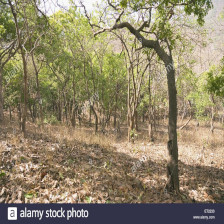

In [ ]:
cv2_imshow(background)

In [ ]:
rows, cols, channels = foreground.shape
roi = background[99:rows+99, 99:cols+99 ]

In [ ]:
img2gray = cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 240, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

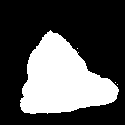

In [ ]:
cv2_imshow(mask)

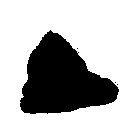

In [ ]:
cv2_imshow(mask_inv)

In [ ]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

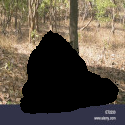

In [ ]:
cv2_imshow(img1_bg)

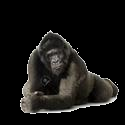

In [ ]:
img2_fg = cv2.bitwise_and(foreground,foreground,mask = mask)
cv2_imshow(img2_fg)

In [ ]:
dst = cv2.add(img1_bg,img2_fg)

In [ ]:
background[99:rows+99, 99:cols+99] = dst

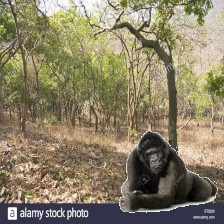

In [ ]:
cv2_imshow(background)